<a href="https://colab.research.google.com/github/ksuaray/IRML---Regression-and-Classification/blob/main/Regression_Baseline_Statistical_Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Introduction

This is a sandbox Jupyter Notebook for the first unit of the Regression and Classification module, covering Baseline Statistical Models. This is the ideal place to start because classical statistical methodology is the perfect bridge to machine learning for higher ed professionals:

*   it provides a familiar access point for most higher ed professionals. Most have taken at least an introductory statistics course at the undergraduate level, and many have taken upper division and/or graduate level research methods courses, which cover this content.
*   The machine learning approach to problem solving, model selection and evaluation are rooted in statistical methodology.
* Statistical methods provide well understood and developed methods for interpretation and inference of model parameters and predicted outcomes.



#Higher Education Challenge

Higher Ed Challenge: Academic warning and probation are precursors to disqualification. The sooner we can reliably predict that a student is likely to fall below a threshold GPA, the sooner we can deploy time-tested interventions to ensure that the student has access to resources that can help turn things around for them.

Antonio works at the student success center of a large university and is responsible for a caseload of 500 students. After their Freshman year he is tasked with reaching out to each student to encourage those on track to sustain high level of performance, and warn those whose track record implies danger of academic warning (falling below a 2.5 GPA in their third semester).

As a seasoned professional, he has an indication of what factors would be predictive, but would like to be efficient and lean more on his computer to do the heavy lifting, and use his domain knowledge to refine the results.


#Data Ingestion and Wrangling

Data can be accessed here: https://www.kaggle.com/datasets/sumithbhongale/american-university-data-ipeds-dataset

In [3]:
import pandas as pd
import statsmodels.api as sms
import matplotlib.pyplot as plt
import seaborn as sns

First upload the data into Colab by clicking the folder icon on the left.

In [4]:
df = pd.read_excel("IPEDS_data.xlsx")

In [5]:
df.shape

(1534, 145)

In [6]:
df.columns

Index(['ID number', 'Name', 'year', 'ZIP code', 'Highest degree offered',
       'County name', 'Longitude location of institution',
       'Latitude location of institution', 'Religious affiliation',
       'Offers Less than one year certificate',
       ...
       'Percent of freshmen  receiving federal grant aid',
       'Percent of freshmen receiving Pell grants',
       'Percent of freshmen receiving other federal grant aid',
       'Percent of freshmen receiving state/local grant aid',
       'Percent of freshmen receiving institutional grant aid',
       'Percent of freshmen receiving student loan aid',
       'Percent of freshmen receiving federal student loans',
       'Percent of freshmen receiving other loan aid',
       'Endowment assets (year end) per FTE enrollment (GASB)',
       'Endowment assets (year end) per FTE enrollment (FASB)'],
      dtype='object', length=145)

In [7]:
pd.set_option('display.max_columns',None)

In [8]:
df.tail()

,ID number,Name,year,ZIP code,Highest degree offered,County name,Longitude location of institution,Latitude location of institution,Religious affiliation,Offers Less than one year certificate,Offers One but less than two years certificate,Offers Associate's degree,Offers Two but less than 4 years certificate,Offers Bachelor's degree,Offers Postbaccalaureate certificate,Offers Master's degree,Offers Post-master's certificate,Offers Doctor's degree - research/scholarship,Offers Doctor's degree - professional practice,Offers Doctor's degree - other,Offers Other degree,Applicants total,Admissions total,Enrolled total,Percent of freshmen submitting SAT scores,Percent of freshmen submitting ACT scores,SAT Critical Reading 25th percentile score,SAT Critical Reading 75th percentile score,SAT Math 25th percentile score,SAT Math 75th percentile score,SAT Writing 25th percentile score,SAT Writing 75th percentile score,ACT Composite 25th percentile score,ACT Composite 75th percentile score,"Estimated enrollment, total","Estimated enrollment, full time","Estimated enrollment, part time","Estimated undergraduate enrollment, total","Estimated undergraduate enrollment, full time","Estimated undergraduate enrollment, part time","Estimated freshman undergraduate enrollment, total","Estimated freshman enrollment, full time","Estimated freshman enrollment, part time","Estimated graduate enrollment, total","Estimated graduate enrollment, full time","Estimated graduate enrollment, part time",Associate's degrees awarded,Bachelor's degrees awarded,Master's degrees awarded,Doctor's degrese - research/scholarship awarded,Doctor's degrees - professional practice awarded,Doctor's degrees - other awarded,Certificates of less than 1-year awarded,Certificates of 1 but less than 2-years awarded,Certificates of 2 but less than 4-years awarded,Postbaccalaureate certificates awarded,Post-master's certificates awarded,Number of students receiving an Associate's degree,Number of students receiving a Bachelor's degree,Number of students receiving a Master's degree,Number of students receiving a Doctor's degree,Number of students receiving a certificate of less than 1-year,Number of students receiving a certificate of 1 but less than 4-years,Number of students receiving a Postbaccalaureate or Post-master's certificate,Percent admitted - total,Admissions yield - total,"Tuition and fees, 2010-11","Tuition and fees, 2011-12","Tuition and fees, 2012-13","Tuition and fees, 2013-14",Total price for in-state students living on campus 2013-14,Total price for out-of-state students living on campus 2013-14,State abbreviation,FIPS state code,Geographic region,Sector of institution,Level of institution,Control of institution,Historically Black College or University,Tribal college,Degree of urbanization (Urban-centric locale),Carnegie Classification 2010: Basic,Total enrollment,Full-time enrollment,Part-time enrollment,Undergraduate enrollment,Graduate enrollment,Full-time undergraduate enrollment,Part-time undergraduate enrollment,Percent of total enrollment that are American Indian or Alaska Native,Percent of total enrollment that are Asian,Percent of total enrollment that are Black or African American,Percent of total enrollment that are Hispanic/Latino,Percent of total enrollment that are Native Hawaiian or Other Pacific Islander,Percent of total enrollment that are White,Percent of total enrollment that are two or more races,Percent of total enrollment that are Race/ethnicity unknown,Percent of total enrollment that are Nonresident Alien,Percent of total enrollment that are Asian/Native Hawaiian/Pacific Islander,Percent of total enrollment that are women,Percent of undergraduate enrollment that are American Indian or Alaska Native,Percent of undergraduate enrollment that are Asian,Percent of undergraduate enrollment that are Black or African American,Percent of undergraduate enrollment that are Hispanic/Latino,Percent of undergraduate enrollment that are Native Hawaiian or

In [9]:
dfx = df[['Highest degree offered','Applicants total','Admissions total','Enrolled total','ACT Composite 75th percentile score','Estimated enrollment, total','Percent admitted - total','Admissions yield - total','Percent of total enrollment that are Asian',	'Percent of total enrollment that are Black or African American',	'Percent of total enrollment that are Hispanic/Latino','Endowment assets (year end) per FTE enrollment (FASB)','Graduation rate - Bachelor degree within 4 years, total',	'Graduation rate - Bachelor degree within 6 years, total']]

In [10]:
dfx.head()

,Highest degree offered,Applicants total,Admissions total,Enrolled total,ACT Composite 75th percentile score,"Estimated enrollment, total",Percent admitted - total,Admissions yield - total,Percent of total enrollment that are Asian,Percent of total enrollment that are Black or African American,Percent of total enrollment that are Hispanic/Latino,Endowment assets (year end) per FTE enrollment (FASB),"Graduation rate - Bachelor degree within 4 years, total","Graduation rate - Bachelor degree within 6 years, total"
0,Doctor's degree - research/scholarship,6142.0,5521.0,1104.0,19.0,5024.0,90.0,20.0,1.0,92.0,1.0,NaN,10.0,29.0
1,Doctor's degree - research/scholarship and pro...,5689.0,4934.0,1773.0,28.0,18568.0,87.0,36.0,5.0,21.0,3.0,NaN,29.0,53.0
2,Doctor's degree - research/scholarship and pro...,NaN,NaN,NaN,NaN,626.0,NaN,NaN,0.0,40.0,1.0,302.0,0.0,67.0
3,Doctor's degree - research/scholarship and pro...,2054.0,1656.0,651.0,29.0,7376.0,81.0,39.0,4.0,12.0,3.0,NaN,16.0,48.0
4,Doctor's degree - research/scholarship and pro...,10245.0,5251.0,1479.0,19.0,6076.0,51.0,28.0,0.0,91.0,1.0,NaN,9.0,25.0


We'll start with a little bit of EDA - Exploratory Data Analysis

#Exploratory Data Analysis and Feature Engineering

In [11]:
Highest_Degree = dfx.iloc[:,0].value_counts()
hi = Highest_Degree.index
hv = Highest_Degree.values

Text(0.5, 1.0, 'Highest Degree Offered US Institutions')

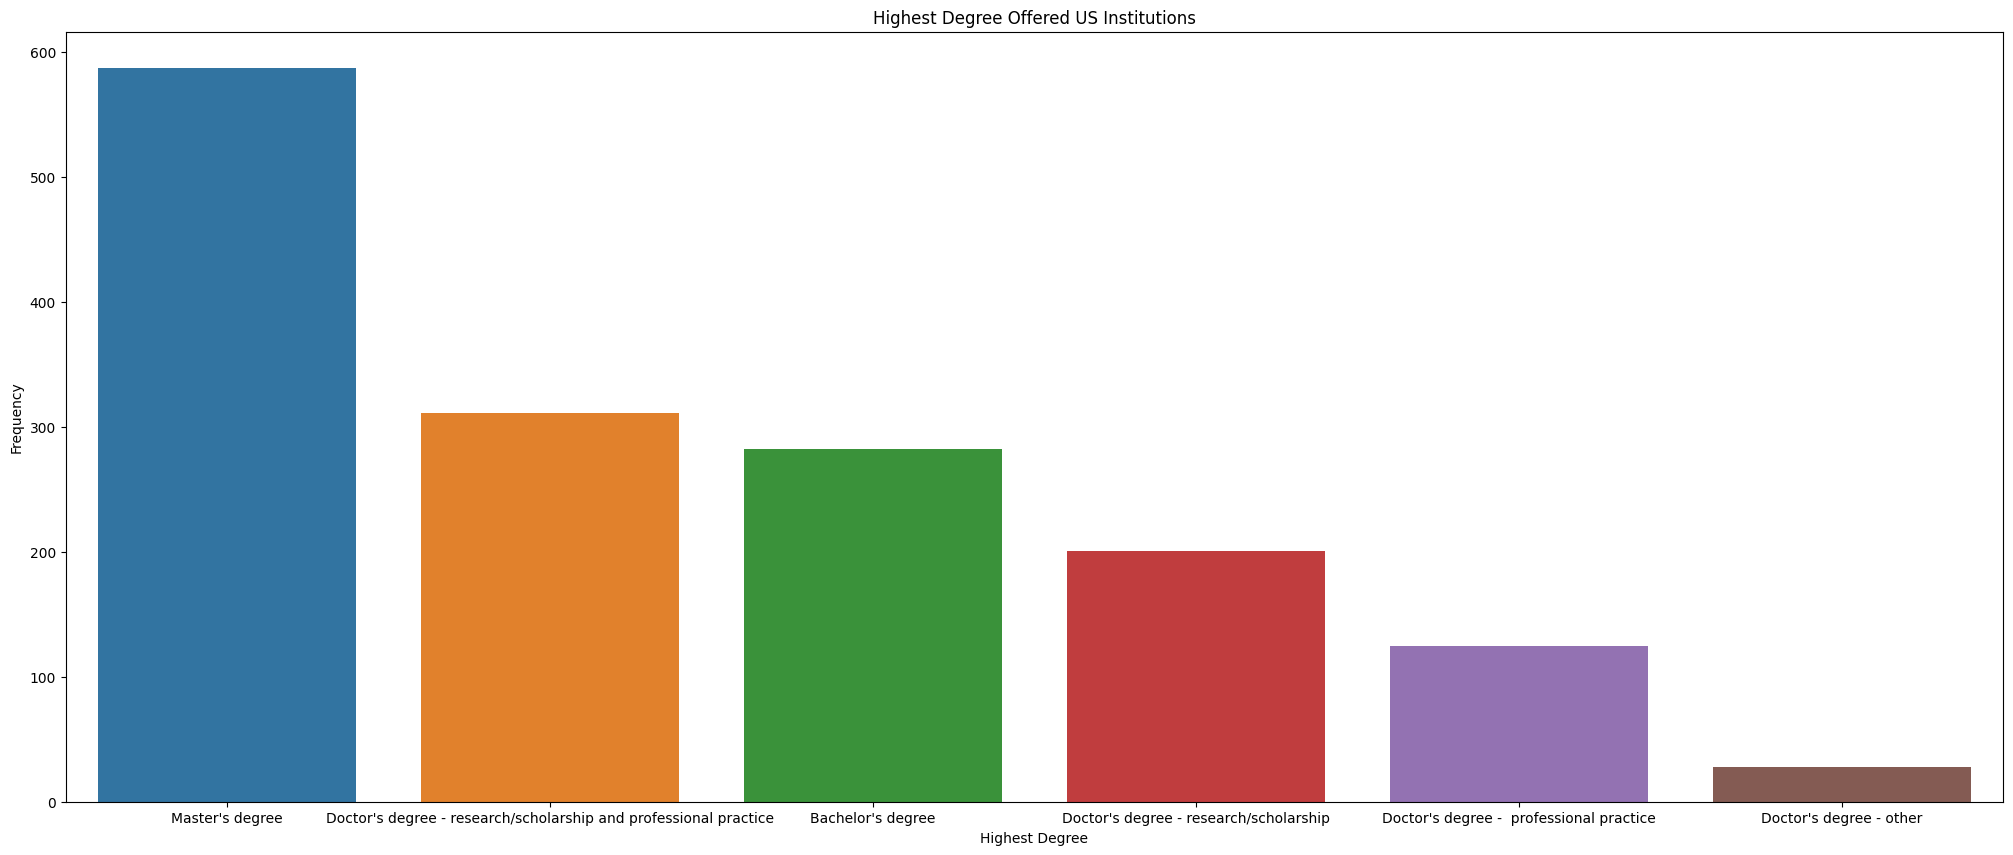

In [12]:
plt.figure(figsize=(25,10))
sns.barplot(dfx,x=hi,y=hv)
plt.xlabel('Highest Degree')
plt.ylabel('Frequency')
plt.title('Highest Degree Offered US Institutions')

In [14]:
dfx_H = pd.get_dummies(dfx.iloc[:,0])
dfx_HD = dfx_H.iloc[:,[0,5]]
dfx_HD['Doctorate'] = dfx_H.iloc[:,1]+dfx_H.iloc[:,2]+dfx_H.iloc[:,3]+dfx_H.iloc[:,4]


<ipython-input-14-3e093e8ae336>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfx_HD['Doctorate'] = dfx_H.iloc[:,1]+dfx_H.iloc[:,2]+dfx_H.iloc[:,3]+dfx_H.iloc[:,4]


In [15]:
dfx_HD['Test'] = dfx_HD.iloc[:,0]+dfx_HD.iloc[:,1]+dfx_HD.iloc[:,2]

<ipython-input-15-059fc9f7e849>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfx_HD['Test'] = dfx_HD.iloc[:,0]+dfx_HD.iloc[:,1]+dfx_HD.iloc[:,2]


In [16]:
dfx_HD['Test'].sum()

1534

In [17]:
dfx_HD

,Bachelor's degree,Master's degree,Doctorate,Test
0,0,0,1,1
1,0,0,1,1
2,0,0,1,1
3,0,0,1,1
4,0,0,1,1
...,...,...,...,...
1529,0,1,0,1
1530,1,0,0,1
1531,0,1,0,1
1532,1,0,0,1


In [18]:
dfx_HDD = dfx_HD.drop(labels = 'Test',axis = 1)

In [19]:
dfx_HDD

,Bachelor's degree,Master's degree,Doctorate
0,0,0,1
1,0,0,1
2,0,0,1
3,0,0,1
4,0,0,1
...,...,...,...
1529,0,1,0
1530,1,0,0
1531,0,1,0
1532,1,0,0


In [20]:
IPEDS1 = pd.concat([dfx,dfx_HDD],axis=1)

In [21]:
IPEDS1

,Highest degree offered,Applicants total,Admissions total,Enrolled total,ACT Composite 75th percentile score,"Estimated enrollment, total",Percent admitted - total,Admissions yield - total,Percent of total enrollment that are Asian,Percent of total enrollment that are Black or African American,Percent of total enrollment that are Hispanic/Latino,Endowment assets (year end) per FTE enrollment (FASB),"Graduation rate - Bachelor degree within 4 years, total","Graduation rate - Bachelor degree within 6 years, total",Bachelor's degree,Master's degree,Doctorate
0,Doctor's degree - research/scholarship,6142.0,5521.0,1104.0,19.0,5024.0,90.0,20.0,1.0,92.0,1.0,NaN,10.0,29.0,0,0,1
1,Doctor's degree - research/scholarship and pro...,5689.0,4934.0,1773.0,28.0,18568.0,87.0,36.0,5.0,21.0,3.0,NaN,29.0,53.0,0,0,1
2,Doctor's degree - research/scholarship and pro...,NaN,NaN,NaN,NaN,626.0,NaN,NaN,0.0,40.0,1.0,302.0,0.0,67.0,0,0,1
3,Doctor's degree - research/scholarship and pro...,2054.0,1656.0,651.0,29.0,7376.0,81.0,39.0,4.0,12.0,3.0,NaN,16.0,48.0,0,0,1
4,Doctor's degree - research/scholarship and pro...,10245.0,5251.0,1479.0,19.0,6076.0,51.0,28.0,0.0,91.0,1.0,NaN,9.0,25.0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1529,Master's degree,393.0,136.0,86.0,25.0,1889.0,35.0,63.0,2.0,6.0,13.0,NaN,NaN,NaN,0,1,0
1530,Bachelor's degree,3033.0,2158.0,127.0,28.0,504.0,71.0,6.0,3.0,3.0,8.0,935.0,57.0,61.0,1,0,0
1531,Master's degree,NaN,NaN,NaN,NaN,445.0,NaN,NaN,3.0,14.0,5.0,20863.0,NaN,NaN,0,1,0
1532,Bachelor's degree,122.0,65.0,20.0,NaN,68.0,53.0,31.0,6.0,3.0,5.0,350.0,46.0,54.0,1,0,0


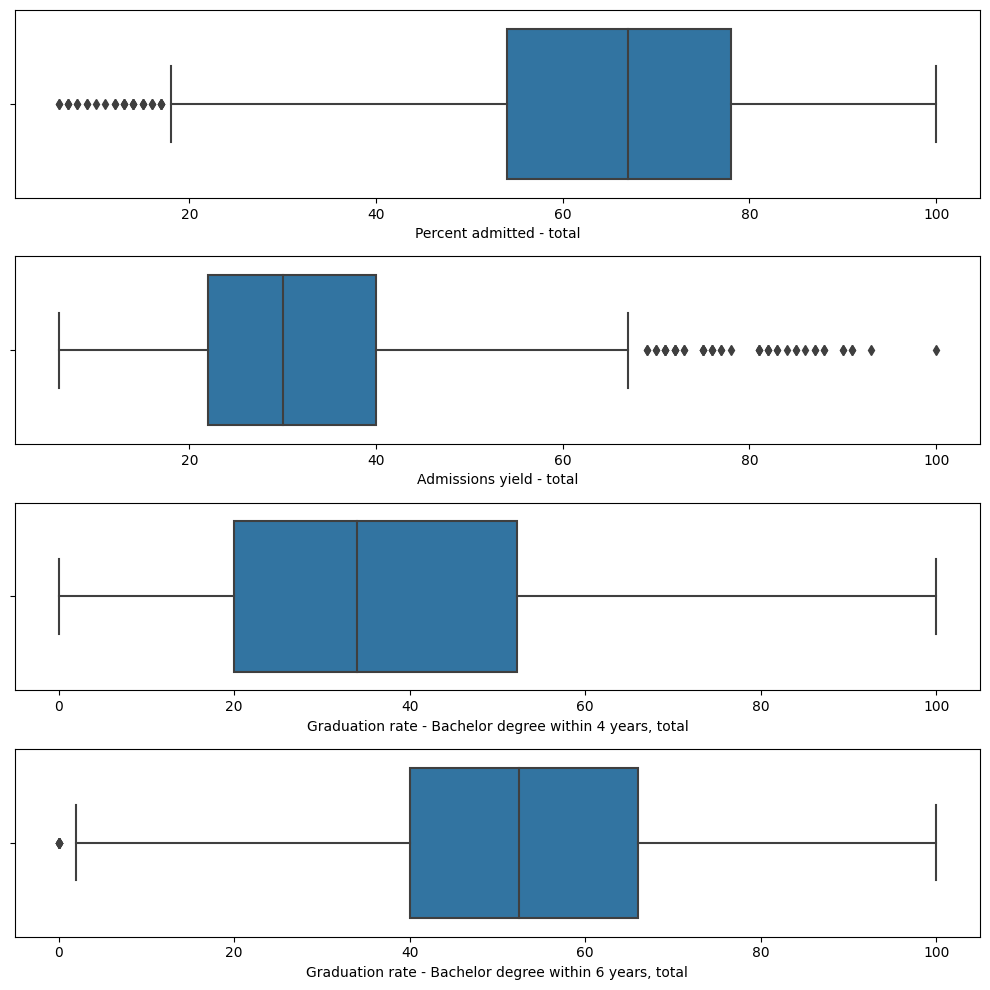

In [22]:
fig, axs = plt.subplots(4, figsize = (10,10))
plt1 = sns.boxplot(x=dfx['Percent admitted - total'], ax = axs[0])
plt2 = sns.boxplot(x=dfx['Admissions yield - total'], ax = axs[1])
plt3 = sns.boxplot(x=dfx['Graduation rate - Bachelor degree within 4 years, total'], ax = axs[2])
plt3 = sns.boxplot(x=dfx['Graduation rate - Bachelor degree within 6 years, total'], ax = axs[3])
plt.tight_layout()

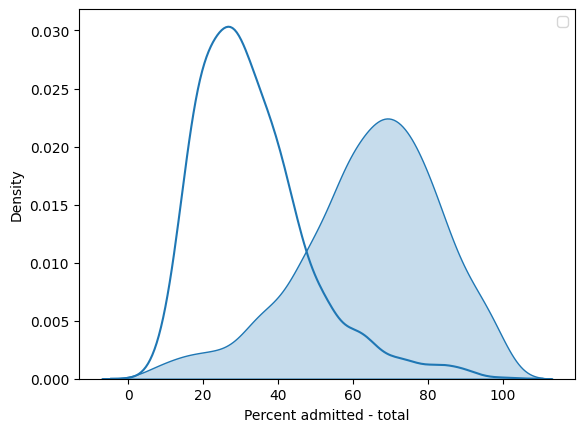

In [23]:
sns.kdeplot(data=dfx,x='Percent admitted - total',fill=True)
sns.kdeplot(data=dfx,x='Admissions yield - total')
plt.legend()
plt.show()

<Axes: xlabel='Percent admitted - total', ylabel='Density'>

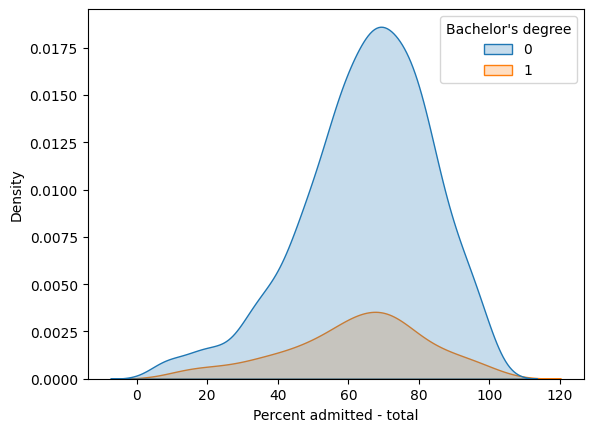

In [24]:
sns.kdeplot(data=IPEDS1,x='Percent admitted - total',hue="Bachelor's degree",fill=True)

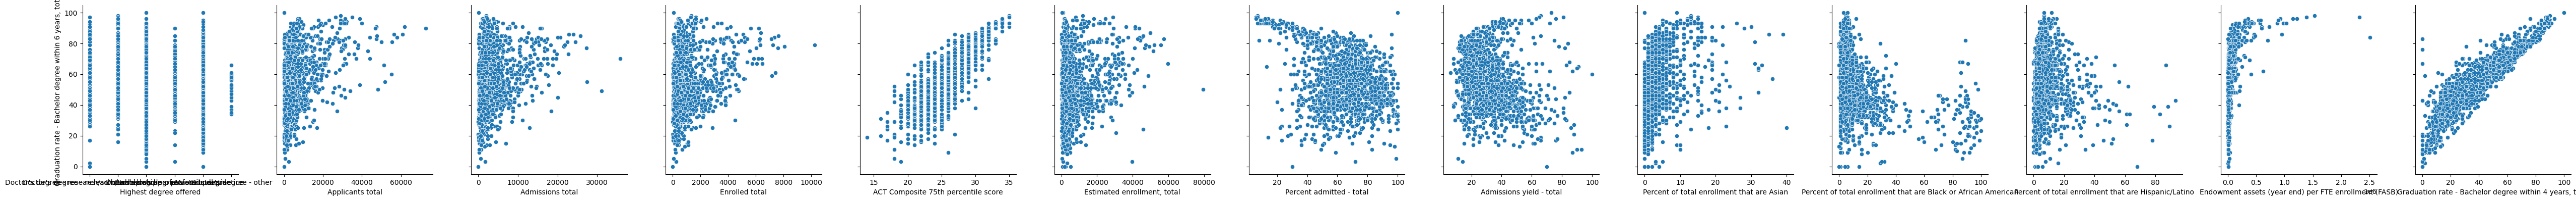

In [25]:
sns.pairplot(dfx, x_vars=['Highest degree offered','Applicants total','Admissions total','Enrolled total','ACT Composite 75th percentile score','Estimated enrollment, total','Percent admitted - total','Admissions yield - total','Percent of total enrollment that are Asian',	'Percent of total enrollment that are Black or African American',	'Percent of total enrollment that are Hispanic/Latino','Endowment assets (year end) per FTE enrollment (FASB)','Graduation rate - Bachelor degree within 4 years, total'], y_vars='Graduation rate - Bachelor degree within 6 years, total', height=4, aspect=1, kind='scatter')
plt.show()



# Predictive Modeling
Now that we have some perspective on the nature of our explanatory variables, as well as their potential association with the target variable, our goal is to formally construct a statistical model that does a solid job of *fitting* the data. This means we'd like to create a mathematical function, characterized by *parameters* that use our data to learn the relationship between our predictors and our response variable, *'Graduation rate - Bachelor degree within 6 years, total'*. A more complex model will learn more nuanced features of this relationship. It might seem like a good idea to create the most complex model we can so that we learn all of the details of the relationship, but we'll see that there are a number of compelling reasons why this is far from ideal.

##The Multiple Linear Regression Model

---


The baseline statistical model used for predicting a numerical response with one or more quantitative and/or qualitative explanatory variables is the *multiple linear regression* model, and it takes the form

$y_i=\beta_0+\beta_1\ x_{i1}+\beta_2\ x_{i2}+\cdots+\beta_{(p-1)}\ x_{(ip-1)}+\epsilon_i$

for $i=i\ldots n$


In [26]:
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score



For modeling in scikitlearn, we'll need to create a new dataframe with our explanatory variables. Let's do so by excluding variables we don't need:Highest degree offered, ... and Doctorate

In [29]:
IPEDS1C = IPEDS1.dropna()

In [30]:
IPEDS1C.shape

(758, 17)

In [68]:
IP_X = IPEDS1C.iloc[:,list(range(1,12,1))+[14,15]]


In [32]:
IP_y = IPEDS1C.iloc[:,13]

In [33]:
IP_X['Endowment assets (year end) per FTE enrollment (FASB)'].isna().sum()

0

In [34]:
IP_y.isna().sum()

0

In [35]:
range(1,11,1)

range(1, 11)

In [66]:
X, y = IP_X, IP_y
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=33)

In [37]:
scaler = preprocessing.StandardScaler().fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [41]:
pd.DataFrame(X_train).describe()

,0,1,2,3,4,5,6,7,8,9,10,11,12
count,5.680000e+02,5.680000e+02,5.680000e+02,5.680000e+02,5.680000e+02,5.680000e+02,5.680000e+02,5.680000e+02,5.680000e+02,5.680000e+02,5.680000e+02,5.680000e+02,5.680000e+02
mean,5.942039e-17,4.065605e-17,5.629300e-17,3.174300e-16,3.752867e-17,-6.254778e-17,-9.382166e-17,3.127389e-17,3.440128e-17,2.501911e-17,-2.189172e-17,2.501911e-17,6.567516e-17
std,1.000881e+00,1.000881e+00,1.000881e+00,1.000881e+00,1.000881e+00,1.000881e+00,1.000881e+00,1.000881e+00,1.000881e+00,1.000881e+00,1.000881e+00,1.000881e+00,1.000881e+00
min,-6.444073e-01,-8.072391e-01,-9.069097e-01,-2.936181e+00,-6.409641e-01,-2.905397e+00,-1.634393e+00,-8.514971e-01,-7.350699e-01,-9.878008e-01,-4.167454e-01,-5.148140e-01,-8.039756e-01
25%,-4.916555e-01,-5.409498e-01,-5.649505e-01,-6.429520e-01,-4.433562e-01,-5.349921e-01,-7.215758e-01,-6.233601e-01,-4.728499e-01,-5.714732e-01,-3.563384e-01,-5.148140e-01,-8.039756e-01
50%,-3.249477e-01,-2.932991e-01,-2.781327e-01,-6.964473e-02,-2.933190e-01,1.864353e-01,-1.890989e-01,-3.952232e-01,-3.417400e-01,-2.939214e-01,-2.873320e-01,-5.148140e-01,-8.039756e-01
75%,2.398566e-02,1.142460e-01,8.481314e-02,5.036626e-01,-2.291454e-02,6.502101e-01,4.955142e-01,2.891877e-01,6.797867e-02,1.224062e-01,-1.139181e-01,-5.148140e-01,1.243819e+00
max,7.023820e+00,1.153077e+01,7.609562e+00,2.510238e+00,1.243096e+01,1.938473e+00,4.679261e+00,6.448886e+00,5.689319e+00,7.477528e+00,1.330133e+01,1.942449e+00,1.243819e+00


In [42]:
regr = LinearRegression()

regr.fit(X_train, y_train)

print(regr.score(X_test, y_test))

0.7559463311300874


In [43]:
y_fit = regr.predict(X_train)

r2_score(y_train,y_fit)


0.7182198526085832

<Axes: ylabel='Graduation rate - Bachelor degree within 6 years, total'>

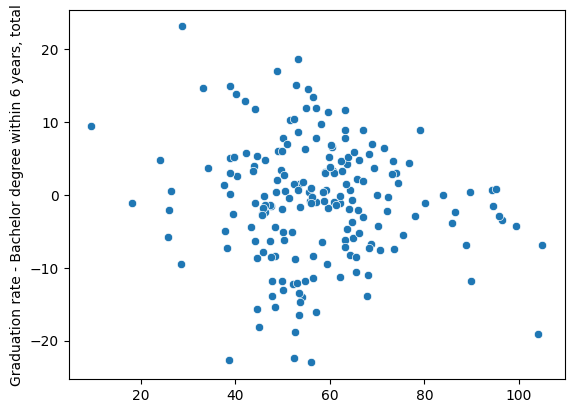

In [44]:
y_pred = regr.predict(X_test)

res_test = y_test - y_pred
sns.scatterplot(x=y_pred,y=res_test)

#plt.scatter(X_test, y_test, color ='b')

#plt.plot(X_test, y_pred, color ='k')

#plt.show()

# Data scatter of predicted values

In [45]:
y_pred.shape

(190,)

In [46]:
r2_score(y_test,y_pred)

0.7559463311300874

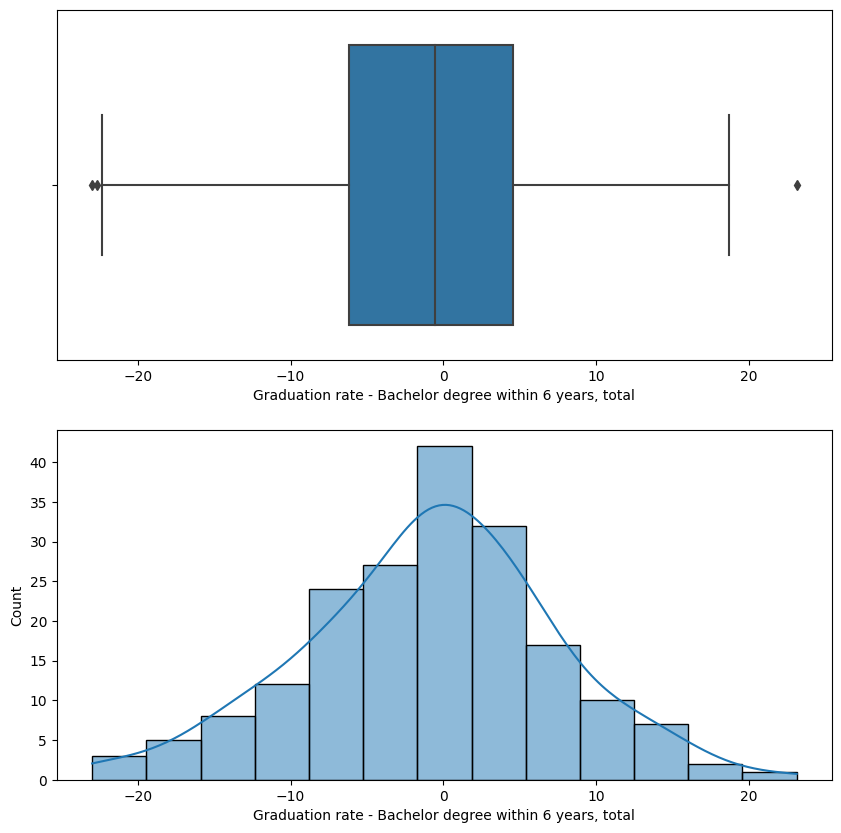

In [47]:
fig, axs = plt.subplots(2, figsize = (10,10))
plt1 = sns.boxplot(x=res_test, ax = axs[0])
plt2 = sns.histplot(x=res_test, ax = axs[1],kde=True)
#plt3 = sns.kdeplot(x=res_test, ax = axs[1])

In [48]:
res_test.describe()

count    190.000000
mean      -0.850598
std        8.262010
min      -22.997694
25%       -6.197789
50%       -0.512506
75%        4.593024
max       23.142398
Name: Graduation rate - Bachelor degree within 6 years, total, dtype: float64

Imputing missing data
MICE (multivariate imputation) method - https://journals.plos.org/plosone/article?id=10.1371/journal.pone.0254720


In [70]:
import numpy as np
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
imp = IterativeImputer(max_iter=10, random_state=0)
imp.fit(IP_X)
IterativeImputer(random_state=0)
# the model learns that the second feature is double the first
IP_Xi = imp.transform(IP_X)

In [72]:
type(IP_Xi)

numpy.ndarray

In [75]:
IP_Xii = pd.DataFrame(IP_Xi,columns = IP_X.columns)

In [78]:
IP_X.shape

(758, 13)

# Higher Education Actionable Insight